In [76]:
import numpy as np
import googlemaps
import CycleGan
import glob
import imageio
import scipy
import matplotlib.pyplot as plt
import bisect

## Pre Processing

In [14]:
path=".\\data\\Japanese\\"

trainA=glob.glob(path+"trainA\\*.jpg")
trainB=glob.glob(path+"trainB\\*.jpg")

In [41]:
trainA_dim=[]
for i in trainA:
    img=imageio.imread(i)
    trainA_dim.append(img.shape)

Text(0.5, 1.0, 'image dimensions')

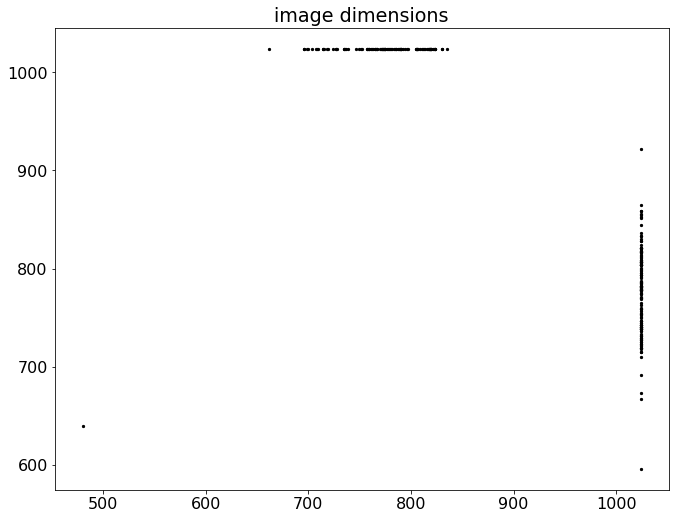

In [45]:
y,x=np.array(trainA_dim)[:,0], np.array(trainA_dim)[:,1]

plt.rcParams.update({'font.size':16})
fig,ax=plt.subplots(1, figsize=[11,8.5])
ax.scatter(x,y, s=5, color='black')
ax.set_title("image dimensions")

In [46]:
trainB_dim=[]
for i in trainB:
    img=imageio.imread(i)
    trainB_dim.append(img.shape)

Text(0.5, 1.0, 'image dimensions')

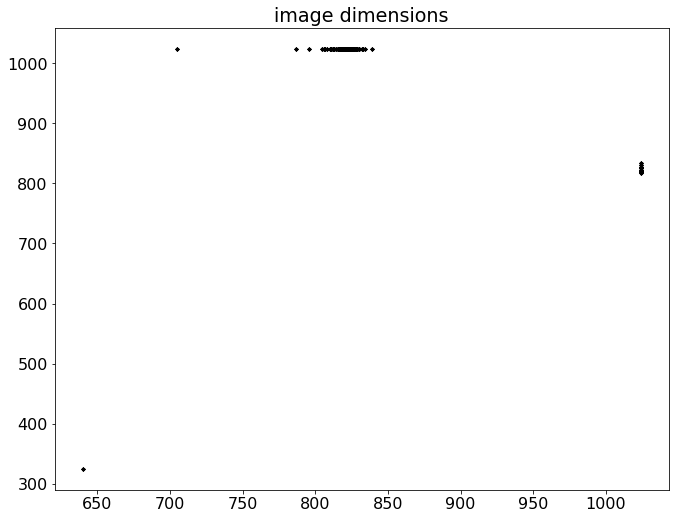

In [47]:
y,x=np.array(trainB_dim)[:,0], np.array(trainB_dim)[:,1]

plt.rcParams.update({'font.size':16})
fig,ax=plt.subplots(1, figsize=[11,8.5])
ax.scatter(x,y, s=5, color='black')
ax.set_title("image dimensions")

trainB's dimensions are less widespread than the trainA. Both training sets seem to favor the number 1024.

In [162]:
from PIL import Image

def preproc(img_path, resize=(512,512)):
    img = Image.open(img_path)
    
    #img=imageio.imread(img_path)
    ind1, ind2 =np.array(img).shape
    assert ind1>=resize[0]
    assert ind2>=resize[1]
    print('original: ', ind1, ind2)
    
    plt.imshow(img)
    plt.show()
    
    smallest=min(ind1, ind2)
    aspect_ratio=ind2/ind1
    adjust_ratio=resize[0]/smallest
    new_ind2=int(adjust_ratio*ind2)
    new_ind1=int(adjust_ratio*ind1)
    
    img=img.resize((new_ind2,new_ind1))
    print('after image resize: ', np.array(img).shape)
    plt.imshow(img)
    plt.show()
    
    
    ind=bisect.bisect_left((ind1, ind2),resize[0])
    if ind==0: # first index is 512
        diff=ind1-512
        img=np.array(img)[:,int(0+diff/2):int(ind1-diff/2)]
        print("diff ",diff)
        print(img.shape)
        plt.imshow(img)
        plt.show()
        
    elif ind==1: # if y is 512
        diff=ind2-512
        img=np.array(img)[int(0+diff/2):int(ind3-diff/2),:]
        print(diff)
        print(img.shape)
        plt.imshow(img)
        plt.show()

original:  728 1024


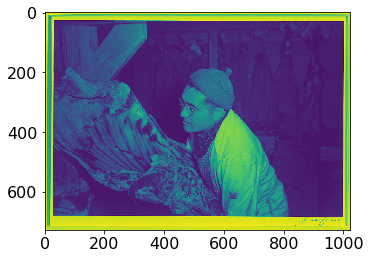

after image resize:  (512, 720)


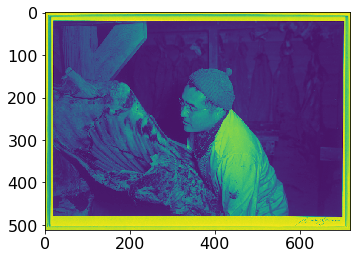

diff  216
(512, 512)


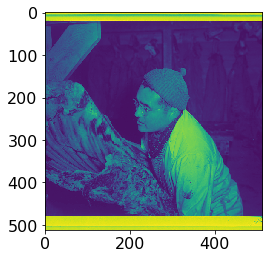

In [163]:
preproc(trainA[0])

In [77]:
bisect.bisect_left((0,1,2),1)

1

In [128]:
bisect.bisect_left((512,777),512.)

0